In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#eventuale comando per ignorare i warnings

#import warnings
#warnings.filterwarnings('ignore')

#Parte 0: Il Dataset

Il datataset contiene dati che descrivono i dipendenti di una impresa secondo le seguenti
feature (l’ordine delle feature nel dataset potrebbe essere diverso):
1. Employee satisfaction level
2. Last evaluation
3. Number of projects
4. Average monthly hours
5. Time spent at the company
6. Whether they have had a work accident
7. Whether they have had a promotion in the last 5 years
8. Sales
9. Salary
10.Whether the employee has left

**Scopo finale del dataset è predire se un dipendente abbandonerà o meno l’impresa.** 

#Parte 1: Analisi (10 punti)




##1. Caricare il dataset e denominarlo con una variabile chiamata “dataset”

In [4]:
dataset = pd.read_csv("/content/HR_comma_sep_orig.csv")
dataset

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low



Numero istanze nel dataset: 14999 
Numero colonne:  10

LISTA COLONNE:
 ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'sales', 'salary']

VALORI TOTALI NaN:
 Empty DataFrame
Columns: [satisfaction_level, last_evaluation, number_project, average_montly_hours, time_spend_company, Work_accident, left, promotion_last_5years, sales, salary]
Index: []

VALORI NaN PER COLONNE:
 satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

VALORI TOTALI NULLI:
 0

VALORI NULLI PER COLONNA:
 satisfaction_level       0.0
last_evaluation          0.0
number_project           0.0
average_montly_hours     0.0
time_spend_company       0.0
Work_accident            0.0
left 

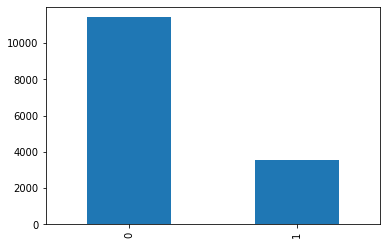

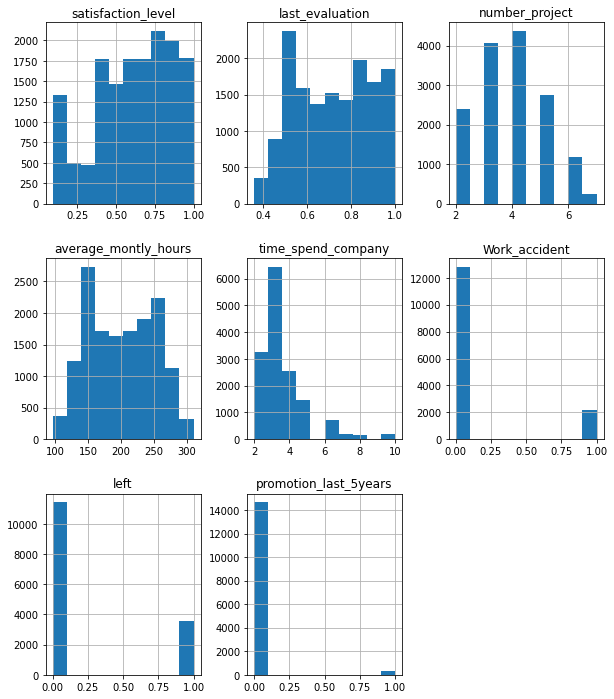

In [14]:
ds = dataset
ds_class = dataset['left']

print("\nNumero istanze nel dataset:", ds.shape[0],"\nNumero colonne: ", ds.shape[1])
print("\nLISTA COLONNE:\n", ds.columns.to_list())
print("\nVALORI TOTALI NaN:\n", ds[ds.isna().any(axis=1)])
print("\nVALORI NaN PER COLONNE:\n", ds.isna().sum())
print("\nVALORI TOTALI NULLI:\n", ds.isna().sum().sum())
print("\nVALORI NULLI PER COLONNA:\n", ds[(ds == 0)].sum(axis=0))
print("\nNUMERO DI CLASSI DEL DATASET E CONTEGGIO:\n", ds_class.value_counts())

#bar plot del numero di classi
ds_class.value_counts().plot.bar()

#istogramma delle features
ds.hist(figsize=(10,12))
plt.show()

##2. 




Quante sono le istanze contenute nel dataset? _______ Il dataset è completo(cioè per
ogni istanza tutti i valori di attributo sono sempre specificati – non esistono “missing
values”)?

In [5]:
dataset.shape #il dataset ha 14999 istanze e 9 features di cui una colonna da predirre (classe = 'left' 0 = no , 1 = si)

(14999, 10)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [9]:
dataset[(dataset == 0)].sum(axis=0)

satisfaction_level       0.0
last_evaluation          0.0
number_project           0.0
average_montly_hours     0.0
time_spend_company       0.0
Work_accident            0.0
left                     0.0
promotion_last_5years    0.0
sales                    0.0
salary                   0.0
dtype: float64

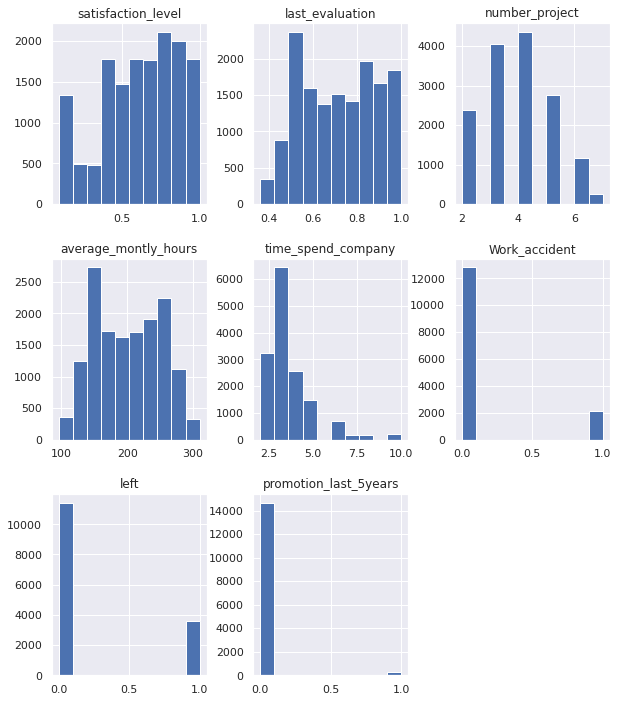

In [17]:
dataset.hist(figsize=(10,12))
plt.show()

In [21]:
dataset['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [22]:
dataset['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

Non ci sono valori NaN

Il dataset è bilanciato per quanto riguarda la classe da predire?

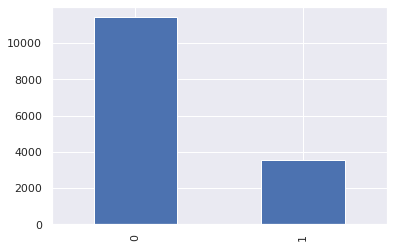

In [24]:
dataset['left'].value_counts().plot.bar()

Il dataset è sbilanciato rispetto la classe da predirre

Osservando direttamente i dati, in che modo l’avere avuto una promozione
negli ultimi 5 anni ha influito sulla scelta del dipendente di abbandonare l’impresa?

In [29]:
(dataset.groupby(['promotion_last_5years','left']).size()/dataset.groupby(['promotion_last_5years']).size())

promotion_last_5years  left
0                      0       0.758038
                       1       0.241962
1                      0       0.940439
                       1       0.059561
dtype: float64

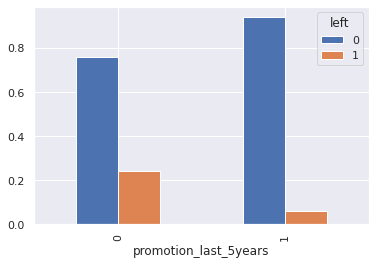

In [28]:
(dataset.groupby(['promotion_last_5years','left']).size()/dataset.groupby(['promotion_last_5years']).size()).unstack().plot.bar()

Chi ha avuto una promozione negli ultimi 5 anni ha meno probabilità di abbandonare rispetto chi non l'ha avuta.
Il 24% di chi non ha avuto la promozione ha abbandonato mentre solo il 5% di chi l'ha ricevuta ha abbandonato

##3. Guardando la media e la mediana si evince che i dipendenti che lavorano nell’impresa sono in generale soddisfatti? 

In [31]:
dataset.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [32]:
dataset['satisfaction_level'].describe()

count    14999.000000
mean         0.612834
std          0.248631
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

il rating va da 0 ad 1 e la media del voto è del 0.61 mentre la mediana è del 0.64, il che vuoldire che il voto medio è maggiore di 0,5/1 (che possiamo interpetare come un voto 5 su 10)
La media dei voti è quindi 6 su 10

Se si rappresenta un istogramma della soddisfazione dei dipendenti (usare il parametro
bins=100 nella funzione che realizza l’istogramma) si osserva che c’è un blocco iniziale
di dipendenti per nulla soddisfatti. Calcolare il valore di insoddisfazione di questo blocco
di dipendenti ___________
Che cosa hanno in comune questi dipendenti (a parte il livello di soddisfazione basso)?

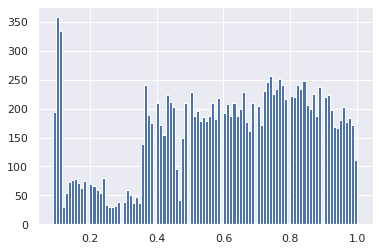

In [33]:
dataset['satisfaction_level'].hist(bins=100)

In [34]:
#CONSIDERIAMO IL 5% PERCENTILE DI VOTI (I PIU' BASSI)
unsatisfied_mask = (dataset['satisfaction_level'] <= dataset['satisfaction_level'].quantile(0.05))

unsatisfied = dataset[unsatisfied_mask]

In [36]:
unsatisfied.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.0,888.000000
mean,0.101577,0.869718,6.192568,276.567568,4.093468,0.045045,1.0,0.003378
std,0.007567,0.065826,0.615536,21.850263,0.324223,0.207520,0.0,0.058058
min,0.090000,0.550000,2.000000,137.000000,2.000000,0.000000,1.0,0.000000
25%,0.100000,0.820000,6.000000,260.000000,4.000000,0.000000,1.0,0.000000
50%,0.100000,0.870000,6.000000,278.000000,4.000000,0.000000,1.0,0.000000
75%,0.110000,0.930000,7.000000,293.250000,4.000000,0.000000,1.0,0.000000
max,0.110000,0.980000,7.000000,310.000000,5.000000,1.000000,1.0,1.000000


Il valore di soddisfazione medio di questo blocco di dipendenti insoddisfatti è del 0.1, molto basso rispetto la media del 0.61.
I dipendenti insoddisfatti ganno in media lasciato un last_evalutation positiva (0,8). Hanno un carico elevato di lavoro con in media 6.2 progetti a carico (nel dataset completo questo valore è superiore alla media)
Pochissimi dipendenti insoddisfatti hanno ricevuto una promozione negli ultimi 5 anni

In [37]:
unsatisfied['salary'].value_counts()

low       528
medium    345
high       15
Name: salary, dtype: int64

I dipendenti insoddisfatti hanno un salario in gran parte basso

##4. Rappresentare in un grafico il salario dei dipendenti insoddisfatti descritti nel punto precedente.

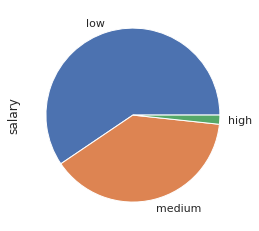

In [43]:
unsatisfied['salary'].value_counts().plot.pie()



5. Analizzare i settori (attributo “sales”) in cui i dipendenti insoddisfatti sono collocati.
C’è un settore che è maggiormente fonte di disagio? 

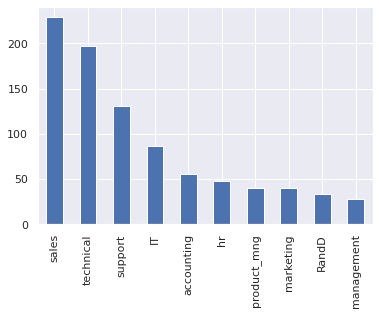

In [46]:
unsatisfied['sales'].value_counts().plot.bar()

I settori delle vendite, tecnico e di supporto sono quelli dove ci sono più dipendenti molto insoddisfatti

#Parte 2: Trasformazione e Predizione (20 punti)



##1. 
Scikit-learn utilizza un array numpy per effettuare le proprie predizioni. Gli elementi
dell’array numpy devono essere delle stesso data type numerico. E’ necessario pertanto
trasformare i dati del dataset per renderli utilizzabili con scikit.
Creare un nuovo dataset dal precedente e chiamarlo reduced in si considerano
unicamente le feature numeriche.

In [47]:
numeric = dataset.select_dtypes(exclude='object')

In [48]:
numeric.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


In [50]:
numeric.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
dtype: object

##2. Nel dataset originale, trasformare i valori dei campi non numerici in numerici,utilizzando una opportuna funzione di trasformazione.

In [68]:
cat_columns = dataset.columns[dataset.dtypes == 'object'].to_list()
cat_columns

['sales', 'salary']

In [77]:
ds = dataset.copy()

In [80]:
categ = dataset.select_dtypes(include='object')

for col in categ.columns:

  unique = categ[col].unique() #lista valori cat. unici per colonna
  
  categ.loc[:,col] = categ.loc[:,col].replace(unique, np.arange(len(unique))) #rimpiazzo con un valore numerico da 0 ad n-1 gli n valori unici possibili

print(categ.head())
print('----------------')
print(categ['salary'].value_counts())
print(categ['sales'].value_counts())

#posso poi eliminare le colonne categoriche del dataset iniziale e poi fare un join
dataset_dropped = dataset.drop(columns = categ.columns)
ds = dataset_dropped.join(categ)

print(ds)

   sales  salary
0      0       0
1      0       1
2      0       1
3      0       0
4      0       0
----------------
0    7316
1    6446
2    1237
Name: salary, dtype: int64
0    4140
3    2720
4    2229
6    1227
7     902
8     858
9     787
1     767
2     739
5     630
Name: sales, dtype: int64
       satisfaction_level  last_evaluation  ...  sales  salary
0                    0.38             0.53  ...      0       0
1                    0.80             0.86  ...      0       1
2                    0.11             0.88  ...      0       1
3                    0.72             0.87  ...      0       0
4                    0.37             0.52  ...      0       0
...                   ...              ...  ...    ...     ...
14994                0.40             0.57  ...      4       0
14995                0.37             0.48  ...      4       0
14996                0.37             0.53  ...      4       0
14997                0.11             0.96  ...      4       0
14998

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [81]:
ds.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0


In [82]:
ds.salary.value_counts()

0    7316
1    6446
2    1237
Name: salary, dtype: int64

In [83]:
ds.sales.value_counts()

0    4140
3    2720
4    2229
6    1227
7     902
8     858
9     787
1     767
2     739
5     630
Name: sales, dtype: int64

##3.
Si vuole predire il il fatto che un dipendente abbia lasciato o meno l’impresa (feature
left)sulla base degli altri attributi presenti nel dataset. Dividere i due dataset (quello
originale e quello ridotto) in modo che ¾ degli elementi siano contenuti in un nuovo
dataset “train” e ¼ nel dataset “test”.
Valutare l’accuracy ottenuta con il modello MultinomialNB su entrambi i dataset
(from sklearn.naive_bayes import MultinomialNB)

In [86]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.naive_bayes import MultinomialNB

In [92]:
#reduced
Xred = numeric.drop(columns='left')
yred = numeric['left']

#full
X = ds.drop(columns='left')
y = ds['left']

In [95]:
# DATASET NUMERIC
X_trainred, X_testred, y_trainred, y_testred =train_test_split(Xred,yred,
                                                   test_size=1/4,
                                                   train_size = 3/4,
                                                   random_state=0,
                                                   stratify=dataset['left'])

#DATASET FULL
X_train, X_test, y_train, y_test =train_test_split(X,y,
                                                   test_size=1/4,
                                                   train_size = 3/4,
                                                   random_state=0,
                                                   stratify=dataset['left'])

In [101]:
modelred= MultinomialNB()

modelfull= MultinomialNB()

modelred.fit(X_trainred,y_trainred)
predictred = modelred.predict(X_testred)

modelfull.fit(X_train,y_train)
predictfull = modelfull.predict(X_test)

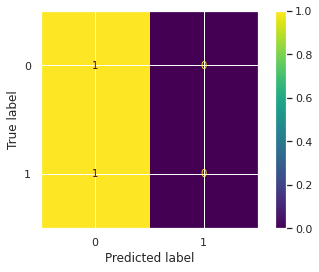


Accuracy NUMERIC: 0.7618666666666667 



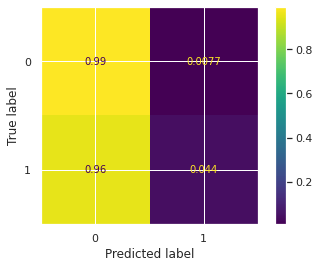


Accuracy FULL: 0.7664 



In [102]:
#ACCURACY + CONFUSION MATRIX NUMERIC
plot_confusion_matrix(modelred, X_testred, y_testred, normalize='true')  
plt.show() 
print("\nAccuracy NUMERIC:", accuracy_score(y_testred, predictred),"\n")

#ACCURACY + CONFUSION MATRIX FULL
plot_confusion_matrix(modelfull, X_test, y_test, normalize='true')  
plt.show() 
print("\nAccuracy FULL:", accuracy_score(y_test, predictfull),"\n")

4. Il valore di accuratezza ottenuto è pari a 0,76
- Cosa si scopre analizzando le confusion matrix?

Le performance del modello sono scarse su tutti e due i dataset in quanto c'è un errore elevato nella predizione della classe 1, ovvero "left"
Questo in quanto non è stato effettuato preprocessing e la classe da predirre è molto sbilanciata.
L'accuracy con dataset full è più alta

In [103]:
print(classification_report(y_test,predictfull))

              precision    recall  f1-score   support

           0       0.77      0.99      0.87      2857
           1       0.64      0.04      0.08       893

    accuracy                           0.77      3750
   macro avg       0.70      0.52      0.47      3750
weighted avg       0.74      0.77      0.68      3750



La recall sulla classe 2 è molto bassa: questo non ci stupisce viste le performance basse nell'indiciduare la classe 2

###5.
Se si utilizza un modello basato su Decision Tree che valore di accuratezza si ottiene?
Cambia qualcosa nella confusion matrix?

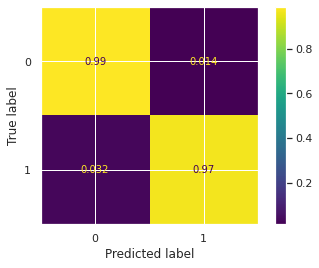


Accuracy NUMERIC: 0.9818666666666667 



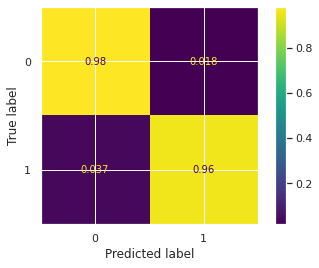


Accuracy FULL: 0.9776 



In [104]:
from sklearn.tree import DecisionTreeClassifier

#reduced
Xred = numeric.drop(columns='left')
yred = numeric['left']

#full
X = ds.drop(columns='left')
y = ds['left']

# DATASET NUMERIC
X_trainred, X_testred, y_trainred, y_testred =train_test_split(Xred,yred,
                                                   test_size=1/4,
                                                   train_size = 3/4,
                                                   random_state=0,
                                                   stratify=dataset['left'])

#DATASET FULL
X_train, X_test, y_train, y_test =train_test_split(X,y,
                                                   test_size=1/4,
                                                   train_size = 3/4,
                                                   random_state=0,
                                                   stratify=dataset['left'])

modelred= DecisionTreeClassifier()

modelfull= DecisionTreeClassifier()

modelred.fit(X_trainred,y_trainred)
predictred = modelred.predict(X_testred)

modelfull.fit(X_train,y_train)
predictfull = modelfull.predict(X_test)

#ACCURACY + CONFUSION MATRIX NUMERIC
plot_confusion_matrix(modelred, X_testred, y_testred, normalize='true')  
plt.show() 
print("\nAccuracy NUMERIC:", accuracy_score(y_testred, predictred),"\n")

#ACCURACY + CONFUSION MATRIX FULL
plot_confusion_matrix(modelfull, X_test, y_test, normalize='true')  
plt.show() 
print("\nAccuracy FULL:", accuracy_score(y_test, predictfull),"\n")

Le performance sono incredibilmente migliori con il modello decision tree
Facendo test sulla parte train ci aspettiamo dell'overfitting in quanto non ne abbiamo limitato la profondità

##6.
Che valore di accuratezza si ottiene con un 5 Fold cross validation e il modello basato
su Decision Tree?
E il modello basato su MultinomialNB?

In [107]:
print("\nDECISION TREE CV SCORES")
modelred= DecisionTreeClassifier()

modelfull= DecisionTreeClassifier()

folds = 5

print("\nResults on reduced")
cv_results = cross_val_score(modelred, Xred, yred, cv=folds, scoring='accuracy')
print("Results:\n",cv_results,"\nMean Accuracy:",cv_results.mean(), "\nAccuracy STD: ",cv_results.std())

print("\nResults on full")
cv_results = cross_val_score(modelfull, X, y, cv=folds, scoring='accuracy')
print("Results:\n",cv_results,"\nMean Accuracy:",cv_results.mean(), "\nAccuracy STD: ",cv_results.std())


DECISION TREE CV SCORES

Results on reduced
Results:
 [0.982      0.96066667 0.96933333 0.98833333 0.97032344] 
Mean Accuracy: 0.9741313548960765 
Accuracy STD:  0.009822737036647104

Results on full
Results:
 [0.98233333 0.964      0.971      0.99       0.97465822] 
Mean Accuracy: 0.9763983105479603 
Accuracy STD:  0.009012416211085745


In [106]:
print("\nMULTINOMIAL NB TREE CV SCORES")
modelred= MultinomialNB()

modelfull= MultinomialNB()

folds = 5

print("\nResults on reduced")
cv_results = cross_val_score(modelred, Xred, yred, cv=folds, scoring='accuracy')
print("Results:\n",cv_results,"\nMean Accuracy:",cv_results.mean(), "\nAccuracy STD: ",cv_results.std())

print("\nResults on full")
cv_results = cross_val_score(modelfull, X, y, cv=folds, scoring='accuracy')
print("Results:\n",cv_results,"\nMean Accuracy:",cv_results.mean(), "\nAccuracy STD: ",cv_results.std())


MULTINOMIAL NB TREE CV SCORES

Results on reduced
Results:
 [0.76166667 0.762      0.762      0.762      0.72724241] 
Mean Accuracy: 0.7549818161609425 
Accuracy STD:  0.013870301828498027

Results on full
Results:
 [0.774      0.76766667 0.767      0.77366667 0.72990997] 
Mean Accuracy: 0.7624486606646661 
Accuracy STD:  0.016528676694188452


In media gli scores con decision trees sono del 0.97 con deviazione std 0.009

In media gli scores con multinomial nb sono del 0.75 con deviazione std 0.01

##7
Creare un dataset bilanciato rispetto l’attributo “left”, e verificare se cambia l’accuratezza con un 5 Fold cross validation e il modello basato su Decision Tree e il modello basato su MultinomialNB

In [108]:
ds.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [111]:
from sklearn.utils import resample

not_left = ds[ds['left']==0] 
left = ds[ds['left']==1]

In [113]:
left = resample(left, replace=True, n_samples=len(not_left)) # can be also n_samples=len(bigger)

dsb = pd.concat([left, not_left])
dsb.groupby('left').size()

left
0    11428
1    11428
dtype: int64

In [114]:
X = dsb.drop(columns='left')
y = dsb['left']

In [115]:
print("\nDECISION TREE CV SCORES")
model= DecisionTreeClassifier()

folds = 5

print("\nResults on reduced")
cv_results = cross_val_score(model, X, y, cv=folds, scoring='accuracy')
print("Results:\n",cv_results,"\nMean Accuracy:",cv_results.mean(), "\nAccuracy STD: ",cv_results.std())



DECISION TREE CV SCORES

Results on reduced
Results:
 [0.98775153 0.98643623 0.98731131 0.99103041 0.98206082] 
Mean Accuracy: 0.9869180594385885 
Accuracy STD:  0.002883945027875921


In [116]:
print("\nMULTINOMIAL NB SCORES")
model= MultinomialNB()

folds = 5

print("\nResults on reduced")
cv_results = cross_val_score(model, X, y, cv=folds, scoring='accuracy')
print("Results:\n",cv_results,"\nMean Accuracy:",cv_results.mean(), "\nAccuracy STD: ",cv_results.std())



MULTINOMIAL NB SCORES

Results on reduced
Results:
 [0.65004374 0.64974841 0.64756071 0.63749727 0.64974841] 
Mean Accuracy: 0.6469197093089244 
Accuracy STD:  0.004794915343040245


- Lo score con modello decision tree è migliorato (0.986) e la deviazione standard è stata ridotta
- Il modello Multinomial NB è degradato in performance (0.64) ma la deviazione standard è stata ridotta

##8. 
Creare une versione 1-of-V della matrice (indicator matrix) per quanto riguarda le
colonne “sales” e “salary”. Si tratta di una matrice in cui ogni colonna è trasformata in
un numero di colonne pari alla cardinalità (i valori unici) del dominio della colonna
originale. Ogni cella nella colonna assume un valore 0 o 1 a seconda del fatto che il
valore inizialmente contenuto dall’attributo sia uguale a quello rappresentato dalla
colonna
Calcolare l’accuratezza con i metodi precedenti. Migliora o peggiora? Questo tipo di
trasformazione è in generale migliore o peggiore di quella effettuata al punto 2?

In [118]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [121]:
data = dataset.copy()

In [122]:
cat_cols = ['sales','salary']

In [123]:
col_transformers = ColumnTransformer(transformers=[('on-hot-encoder',OneHotEncoder(),cat_cols)],
                                      remainder='passthrough')


model1 = DecisionTreeClassifier()
model2 = MultinomialNB()

pipeline1 = Pipeline(steps=[('col_transformers', col_transformers),
                              ('model1', model1)])

pipeline2 = Pipeline(steps=[('col_transformers', col_transformers),
                              ('model2', model2)])

#split del dataset ed allenamento

X = data.drop(columns='left')
y = data['left']


folds = 5

print("\nDECISION TREE CV SCORES")

cv_results = cross_val_score(pipeline1, X, y, cv=folds, scoring='accuracy')
print("Results:\n",cv_results,"\nMean Accuracy:",cv_results.mean(), "\nAccuracy STD: ",cv_results.std())

print("\nMULTINOMIAL NB SCORES")

cv_results = cross_val_score(pipeline2, X, y, cv=folds, scoring='accuracy')
print("Results:\n",cv_results,"\nMean Accuracy:",cv_results.mean(), "\nAccuracy STD: ",cv_results.std())



DECISION TREE CV SCORES
Results:
 [0.979      0.964      0.97       0.98966667 0.97332444] 
Mean Accuracy: 0.9751982216294321 
Accuracy STD:  0.00871461012772838

MULTINOMIAL NB SCORES
Results:
 [0.76166667 0.762      0.76233333 0.762      0.73757919] 
Mean Accuracy: 0.757115838612871 
Accuracy STD:  0.009770597436520114


Le performance sul modello Multinomial NB sono milgiorate (risente dello scaling) mentre quelle del decison tree sono peggiorate di poco
Questo tipo di processing (1-Hot Encoding) è più stabile perchè non impone una distanza tra valori categorici ma solo un numero (1 o 0 - booleano) che ci dice quel valore tra i possibili ha assunto la feature categorica di quella istanza. Il one hot encoding è utile in modelli che risentono di valori numerici differenti interpretati come distanze, che in realtà non lo sono. Il decision tree invece risente poco di questi problemi (come si è infatti visto)

##9.
Raggruppare i valori dell’attributo “average_montly_hours” in 6 gruppi. Sostituire al
valore originale dell’attributo un numero che va da 1 a 6 e che indica l’appartenenza
allo specifico gruppo. Valutare l’accuratezza.

In [129]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import FunctionTransformer



In [132]:
col_transformers = ColumnTransformer(transformers=[('on-hot-encoder',OneHotEncoder(),cat_cols),
                                                   ('hours_binner',KBinsDiscretizer(n_bins=6,encode='ordinal'), ['average_montly_hours'])],
                                      remainder='passthrough')


model1 = DecisionTreeClassifier()
model2 = MultinomialNB()

pipeline1 = Pipeline(steps=[('col_transformers', col_transformers),
                              ('model1', model1)])

pipeline2 = Pipeline(steps=[('col_transformers', col_transformers),
                              ('model2', model2)])

#split del dataset ed allenamento

X = data.drop(columns='left')
y = data['left']


folds = 5

print("\nDECISION TREE CV SCORES")

cv_results = cross_val_score(pipeline1, X, y, cv=folds, scoring='accuracy')
print("Results:\n",cv_results,"\nMean Accuracy:",cv_results.mean(), "\nAccuracy STD: ",cv_results.std())

print("\nMULTINOMIAL NB SCORES")

cv_results = cross_val_score(pipeline2, X, y, cv=folds, scoring='accuracy')
print("Results:\n",cv_results,"\nMean Accuracy:",cv_results.mean(), "\nAccuracy STD: ",cv_results.std())


DECISION TREE CV SCORES
Results:
 [0.979      0.96233333 0.96566667 0.98933333 0.97199066] 
Mean Accuracy: 0.9736647993775703 
Accuracy STD:  0.00968650919920504

MULTINOMIAL NB SCORES
Results:
 [0.76166667 0.762      0.762      0.762      0.73891297] 
Mean Accuracy: 0.7573159275313994 
Accuracy STD:  0.009202383877549736


Le accuratezze sono quasi identiche ai risultati del punto precedente, questo mostra che il binning della colonna average_montly_hours nonf a molta differenza


##10
Si consideri un nuovo dataset ottenuto attraverso una variazione a piacere del
precedente e si analizzi l’accuratezza ottenuta con un modello basato su Decision Tree.
Che valore si ottiene? 

In [133]:
from sklearn.preprocessing import StandardScaler


DECISION TREE CV SCORES
Results:
 [0.988      0.982      0.97533333 0.97333333 0.97266667 0.976
 0.98533333 0.98266667 0.98666667 0.98532355] 
Mean Accuracy: 0.9807323549032688 
Accuracy STD:  0.00554054814309936


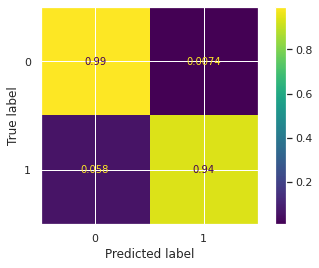


Accuracy: 0.9818666666666667 



In [141]:
col_transformers = ColumnTransformer(transformers=[('on-hot-encoder',OneHotEncoder(),cat_cols),
                                                   ],
                                      remainder='passthrough')


model1 = DecisionTreeClassifier(max_depth=10)
stdscaler = StandardScaler()

pipeline1 = Pipeline(steps=[('col_transformers', col_transformers),
                            ('scaler', stdscaler),
                              ('model1', model1)])



#split del dataset ed allenamento

X = data.drop(columns='left')
y = data['left']


folds = 10

print("\nDECISION TREE CV SCORES")

cv_results = cross_val_score(pipeline1, X, y, cv=folds, scoring='accuracy')
print("Results:\n",cv_results,"\nMean Accuracy:",cv_results.mean(), "\nAccuracy STD: ",cv_results.std())


X_train, X_test, y_train, y_test =train_test_split(X,y,
                                                   test_size=1/4,
                                                   train_size = 3/4,
                                                   random_state=0,
                                                   stratify=dataset['left'])


pipeline1.fit(X_train,y_train)
pipeline1.predict(X_test)

plot_confusion_matrix(pipeline1, X_test, y_test, normalize='true')  
plt.show() 
print("\nAccuracy:", accuracy_score(y_testred, predictred),"\n")

Si è appliocato uno standard scaler è si è impostata una profondità massima dell'albero del decision tree classifier pari a 10
L'accuratezza è simile ai risultati precedenti ma la deviazione standard con la cv 10 fold è scesa (folder aumentati a 10)